In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(10, 8)
sns.set()

In [5]:
files = ['fileViews',
         'premium_cancellations',
         'premium_payments',
         'questions',
         'sessions',
         'students',
         'subjects'
         ]

datasets = {}
for file in files:
    datasets[file] = pd.read_csv(f"../data/processed/{file}.csv")#,parse_dates=[1,2],index_col=[0])
    print(f'*********{file}***********')
    print(datasets[file].shape)
    print(datasets[file].head())
    print("____________\n\n")

/home/ahgora/projetos/pd/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*********fileViews***********
(3028988, 4)
  StudentId                                           FileName  \
0  12970655  Exercicios Resolvidos do Halliday sobre Rotaçã...   
1  12970655  Exercicios Resolvidos do Halliday sobre Rotaçã...   
2  12970655                                          CALCULO I   
3  12970655                                          CALCULO I   
4  12970655                                          CALCULO I   

                     ViewDate Studentclient  
0  2017-02-23 10:46:03.047000       Website  
1  2017-02-23 10:46:12.370000       Website  
2  2017-05-25 22:39:48.000000       Website  
3  2017-05-25 22:40:36.000000       Website  
4  2017-05-25 22:43:16.000000       Website  
____________


*********premium_cancellations***********
(844, 2)
   StudentId            CancellationDate
0   34129668  2016-05-05 19:08:31.937000
1   34129668  2016-05-05 22:48:20.830000
2   82394932  2016-05-20 22:37:21.117000
3   82942835  2016-05-31 13:44:55.307000
4   85382416 

Explorando premium_payment

In [236]:
payments = datasets['premium_payments'].set_index('StudentId')
payments.PaymentDate = payments.PaymentDate.astype('datetime64')
print( (payments.PaymentDate.max(),payments.PaymentDate.min()) )
november_payments = payments.loc[payments.PaymentDate >= '2017-11-01']
print( (november_payments.PaymentDate.max(),november_payments.PaymentDate.min()) )
november_payments.head(2)

(Timestamp('2018-06-08 03:00:37'), Timestamp('2015-08-08 00:00:00'))
(Timestamp('2018-06-08 03:00:37'), Timestamp('2017-11-01 00:00:55.678196'))


,PaymentDate,PlanType
StudentId,,
12970655,2018-05-26 10:05:28,Anual
36391532,2018-04-21 21:23:58,Mensal


In [237]:
november_payments_agg = november_payments.groupby(['StudentId','PlanType']).PaymentDate.agg(['count','min','max'])
print(november_payments_agg.shape)
november_payments_agg.head(2)

(1737, 3)


,,count,min,max
StudentId,PlanType,,,
43621,Mensal,2,2018-03-05 19:43:13,2018-05-19 14:39:10
105540,Anual,1,2018-04-26 22:35:36,2018-04-26 22:35:36


In [238]:
temp = november_payments_agg.reset_index()
duplicated= temp.StudentId.value_counts() > 1
df_duplicates = pd.DataFrame(duplicated)
duplicated_index = df_duplicates.loc[df_duplicates.StudentId].index

upsell = temp.loc[temp['StudentId'].isin(duplicated_index)]
upsell

,StudentId,PlanType,count,min,max
24,1387231,Anual,1,2018-05-09 01:52:07.000000,2018-05-09 01:52:07.000000
25,1387231,Mensal,3,2017-12-04 18:10:29.908633,2018-02-04 08:46:56.959982
34,1917538,Anual,1,2018-06-07 14:54:22.000000,2018-06-07 14:54:22.000000
35,1917538,Mensal,7,2017-11-06 21:40:49.762953,2018-05-06 09:38:47.000000
36,1925053,Anual,1,2018-04-03 14:24:15.000000,2018-04-03 14:24:15.000000
37,1925053,Mensal,2,2017-11-19 16:00:26.866588,2017-12-19 10:12:01.886407
327,17477694,Anual,1,2018-02-25 14:26:08.000000,2018-02-25 14:26:08.000000
328,17477694,Mensal,2,2017-11-26 08:10:32.581315,2017-12-26 09:59:26.126101
419,22685203,Anual,1,2018-03-27 00:22:49.000000,2018-03-27 00:22:49.000000
420,22685203,Mensal,1,2017-11-17 02:35:49.159299,2017-11-17 02:35:49.159299


Explorando premium_cancellations

In [239]:
#Múltiplos cancelamentos

studants_cancellation = datasets['premium_cancellations']
duplicated_cancellation = studants_cancellation.StudentId.value_counts() > 1
df_duplicates_cancellation = pd.DataFrame(duplicated_cancellation)
duplicated_cancellation_index = df_duplicates_cancellation.loc[df_duplicates_cancellation.StudentId].index

print(duplicated_cancellation_index)
studants_gt_1_cancellation = studants_cancellation.loc[studants_cancellation['StudentId'].isin(duplicated_cancellation_index)]
studants_gt_1_cancellation

Int64Index([80940475, 87461279, 78337805, 25393906, 78985669,  9061848,
            70848728, 82394932, 44648071, 38333199, 53282462, 90436363,
            40203342,  7114951, 98867295, 88821289, 72157495,  2498628,
            91636655, 70704350, 25609896,  9447161, 71379056, 36297488,
             2496782, 23210941, 77746524, 53857098, 12444491, 15818350,
            97838701, 16814666, 84807825, 75579229, 66480953, 46454479,
             9592706, 54503273, 65255005, 88091992, 46226621, 63831634,
            83131510, 31811327, 23636551, 66420739, 34129668, 73289544,
            16143842, 55012889, 58493920, 89046718, 50975816, 74084771,
            83775176, 77891596, 26456075, 93655541, 65714200, 85382416,
            75688451, 81215511, 16806380, 52909502, 78442489, 87258165,
            75156172, 99720133],
           dtype='int64')


,StudentId,CancellationDate,cancellation_day
0,34129668,2016-05-05 19:08:31.937000,2016-05-05
1,34129668,2016-05-05 22:48:20.830000,2016-05-05
2,82394932,2016-05-20 22:37:21.117000,2016-05-20
4,85382416,2016-06-01 14:22:19.467000,2016-06-01
5,85382416,2016-06-01 14:22:26.233000,2016-06-01
...,...,...,...
831,50975816,2018-06-04 15:11:58.345725,2018-06-04
832,78337805,2018-06-04 15:27:27.985600,2018-06-04
833,52909502,2018-06-04 21:13:36.291452,2018-06-04
836,16814666,2018-06-05 12:09:27.859651,2018-06-05


In [253]:
cancellation = datasets['premium_cancellations']
cancellation.CancellationDate = cancellation.CancellationDate.astype('datetime64')
cancellation['cancellation_day'] = cancellation.CancellationDate.map(  lambda x :   x.strftime("%Y-%m-%d") )
cancellation.head(2)
print(cancellation.shape)
november_cancellation = cancellation[cancellation.CancellationDate >= '2017-11-01']
print(november_cancellation.shape)
november_cancellation.tail(2)


(844, 3)
(664, 3)


,StudentId,CancellationDate,cancellation_day
842,62200299,2018-06-07 11:05:04.850847,2018-06-07
843,22275761,2018-06-07 14:44:20.650220,2018-06-07


In [308]:
df_event_cancel = cancellation.copy()
df_event_cancel['event'] = 'cancel'
df_event_cancel['event_type'] = 'cancel'
df_event_cancel['timestamp'] = df_event_cancel['CancellationDate']
event_cancel=df_event_cancel.filter(items=['StudentId', 'timestamp', 'event','event_type'])
event_cancel

,StudentId,timestamp,event,event_type
0,34129668,2016-05-05 19:08:31.937000,cancel,cancel
1,34129668,2016-05-05 22:48:20.830000,cancel,cancel
2,82394932,2016-05-20 22:37:21.117000,cancel,cancel
3,82942835,2016-05-31 13:44:55.307000,cancel,cancel
4,85382416,2016-06-01 14:22:19.467000,cancel,cancel
...,...,...,...,...
839,51676678,2018-06-06 01:00:16.685120,cancel,cancel
840,66480953,2018-06-06 18:19:25.351847,cancel,cancel
841,40700523,2018-06-07 03:07:57.683523,cancel,cancel
842,62200299,2018-06-07 11:05:04.850847,cancel,cancel


In [309]:
df_event_payment = november_payments.copy().reset_index()
df_event_payment['event'] = 'pay'
df_event_payment['timestamp'] = df_event_payment['PaymentDate']
df_event_payment['event_type'] = df_event_payment['PlanType']
event_payment = df_event_payment.filter(items=['StudentId', 'timestamp', 'event','event_type'])
event_payment

,StudentId,timestamp,event,event_type
0,12970655,2018-05-26 10:05:28.000000,pay,Anual
1,36391532,2018-04-21 21:23:58.000000,pay,Mensal
2,36391532,2018-05-21 10:13:29.000000,pay,Mensal
3,67560047,2017-11-22 02:26:08.315583,pay,Mensal
4,36300639,2017-11-02 07:59:13.252279,pay,Mensal
...,...,...,...,...
5457,22349939,2018-01-01 08:03:15.755971,pay,Mensal
5458,22349939,2018-02-01 08:43:28.281252,pay,Mensal
5459,22349939,2018-03-01 10:03:58.000000,pay,Mensal
5460,22349939,2018-04-01 12:59:35.000000,pay,Mensal


In [318]:
df_events = pd.concat([event_cancel, event_payment]).sort_values(by='timestamp').reset_index()
df_events
gt_november_events = df_events.loc[df_events.timestamp  >= '2017-11-01']
gt_november_events

,index,StudentId,timestamp,event,event_type
180,4896,34038363,2017-11-01 00:00:55.678196,pay,Mensal
181,2085,49260757,2017-11-01 01:13:00.717699,pay,Mensal
182,4899,76080886,2017-11-01 01:26:20.758180,pay,Mensal
183,193,49895399,2017-11-01 01:31:52.825098,pay,Mensal
184,3806,92307069,2017-11-01 01:33:23.206908,pay,Mensal
...,...,...,...,...,...
6301,843,22275761,2018-06-07 14:44:20.650220,cancel,cancel
6302,3238,1917538,2018-06-07 14:54:22.000000,pay,Anual
6303,4789,14959829,2018-06-07 19:16:48.000000,pay,Mensal
6304,2795,92778941,2018-06-07 21:49:21.000000,pay,Mensal


In [409]:
from datetime import datetime

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
# 2017-11-01
# 2017-12-01
diff_month( datetime(2017,12,1), datetime(2017,11,1))

1

In [491]:
def retention_time(df: pd.DataFrame, student_id: int)-> int:

    result = df.filter(['StudentId', 'timestamp' ,  'event', 'event_type'])
    result = result.loc[df.StudentId == student_id].reset_index()
    if result.event.values[-1] == 'pay':
        result.loc[-1] = [4, student_id, df.timestamp.values[-1],'end','end']

    cancel_id = list(result.event[result.event == "cancel"].index)
    end_id = list(result.event[result.event == "end"].index)
    duration = 0
    chunks = []
    dates = result.timestamp
    if len(cancel_id) == 0:
        chunks.append(result)
    elif len(cancel_id) == 1 and  result.shape[0]-1 == cancel_id[0]:

        chunks.append(result)
    elif len(cancel_id) == 1 and  result.shape[0]-1 != cancel_id[0]:
        indice = range(0,cancel_id[0]+1)
        indice2 = range(cancel_id[0]+1,result.shape[0])
        chunks.append(result.iloc[indice,:])
        chunks.append(result.iloc[indice2,:])
    elif len(cancel_id) == 2 and len(end_id)==0:
        indice = range(0,cancel_id[0]+1)
        indice2 = range(cancel_id[0]+1,result.shape[0])
        chunks.append(result.iloc[indice,:])
        chunks.append(result.iloc[indice2,:])
    elif len(cancel_id) == 2 and len(end_id)==1:
        indice = range(0,cancel_id[0]+1)
        indice2 = range(cancel_id[0]+1,cancel_id[1]+1)
        indice3 = range(cancel_id[1]+1,result.shape[0])
        chunks.append(result.iloc[indice,:])
        chunks.append(result.iloc[indice2,:])
        chunks.append(result.iloc[indice3,:])
    elif len(cancel_id) == 3 and len(end_id)==0:
        indice  = range(0, cancel_id[0]+1)
        indice2 = range(cancel_id[0]+1, cancel_id[1]+1)
        indice3 = range(cancel_id[1]+1, result.shape[0])
        chunks.append(result.iloc[indice,:])
        chunks.append(result.iloc[indice2,:])
        chunks.append(result.iloc[indice3,:])
    else:
        print(f'{student_id} - retention time = {duration}')
        print(result)

    for chunk in chunks:
        timestamps = chunk.timestamp
        dates_str = timestamps.map(  lambda x :  datetime( int(x.strftime("%Y")),int(x.strftime("%m")),1 ) ).unique()
        if len(dates_str) > 1:
            duration +=   diff_month( pd.to_datetime(dates_str[-1]) , pd.to_datetime(dates_str[0]))  #result.event_type.value_counts().get('Mensal')

    return duration

In [492]:
students_ids = gt_november_events.StudentId.unique()
retention_time_students = []
for id in students_ids:
    retention_time_students.append( (id,retention_time(gt_november_events,id) ) )

df_retention_time = pd.DataFrame(retention_time_students)


   retention
7        600
1        371
2        287
0        197
3        156
4         75
6         59
5         28
retention_mean = 4 months


/home/ahgora/projetos/pd/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


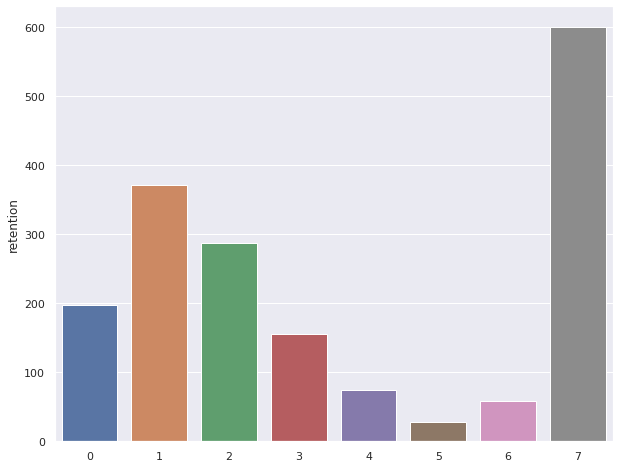

In [533]:
(
 retention_time(gt_november_events,78337805),
 retention_time(gt_november_events,78985669),
 retention_time(gt_november_events,25393906),
 retention_time(gt_november_events,72888232),
retention_time(gt_november_events,40700523),
retention_time(gt_november_events,105540),
    )
df_retention_time.columns = ['id','retention']
total = pd.DataFrame(df_retention_time.retention.value_counts())
sns.barplot(total.index,total.retention)
print(total)

gt_1month = df_retention_time.loc[df_retention_time.retention>0]
retention_mean = round(gt_1month.retention.mean())
print(f'retention_mean = {retention_mean} months')

### Questão 2:
Em Novembro de 2017 fizemos uma grande mudança no PD: o Content
Restriction. Os usuários não Premium passaram a poder consumir no máximo 3 arquivos
diferentes por mês. Diante dessa mudança, qual passou a ser o Lifetime Value (LTV) dos
usuários Premium a partir de Novembro de 2017?

Considerando o LTV = Valor ticket médio x Tempo de retenção de clientes
Ticket médio de `R$ 29,9`  e tempo de retenção de clientes 4 meses temos um LTV de aproximadamente R$ 120,00

In [525]:
from IPython.display import Markdown as md
ticket = 29.9
md(f"LTV = {ticket * retention_mean}")

LTV = 119.6